In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier


from sklearn.utils import resample

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.svm import NuSVR



from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree

from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.decomposition import PCA


import time

In [3]:
data = pd.read_csv('Data/Digit/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Evaluate the data, 
# all rows are filled
# all the independent variavles are well distributed
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
print(data.shape)

(42000, 785)


In [6]:
data['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [7]:
#show that the label is about 50%
data.groupby('label').size()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

In [8]:
# # Set up the dATA
# X = data.drop(['label'], axis = 1)
# y = data[['label']]

In [9]:
X = data.drop('label', axis = 1).copy()
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = data['label'].copy()
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [11]:
# check results
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [12]:
# check results
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 42000 entries, 0 to 41999
Series name: label
Non-Null Count  Dtype
--------------  -----
42000 non-null  int64
dtypes: int64(1)
memory usage: 328.2 KB


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [ ]:
##################
#
# Decision Tree
#
##################

In [ ]:
# model_tree = DecisionTreeClassifier(max_leaf_nodes=8, class_weight='balanced', criterion ='entropy')
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

In [ ]:
var_columns = [c for c in X_train.columns]
# print(var_columns)

In [ ]:
plt.figure(figsize=(20,10))

var_columns = [c for c in X_train.columns]

plot_tree(model_tree,
         feature_names = var_columns,
         class_names = ["0", "1"],
         rounded = True,
         filled = True)

plt.show()

In [ ]:
y_train_pred = model_tree.predict(X_train)
y_test_pred = model_tree.predict(X_test)
# print('y_train_pred :', y_train_pred)
# print('y_test_prod :', y_test_prod)

In [ ]:
train_ans = accuracy_score(y_train, y_train_pred)
test_ans = accuracy_score(y_test, y_test_pred)

print(train_ans, test_ans)

In [ ]:
def tree_training(max_depth, X_train, X_test, y_train, y_test):
    
#     model_tree = DecisionTreeClassifier(max_depth=max_depth, class_weight='balanced')
    model_tree = DecisionTreeClassifier(max_depth=max_depth, class_weight='balanced', criterion ='entropy')

    model_tree.fit(X_train, y_train)
    
    #train_pred = model_tree.predict(X_train)
    test_pred = model_tree.predict(X_test)
    
    test_score = metrics.accuracy_score(y_test, test_pred)

    print("Depth:{}, predict:{:.4f}".format(max_depth, test_score))
          

In [ ]:
# split = [0, 0.2, 0.4, 0.6, 0.8]
split = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


cnt = 1
for i in range (0 , len(split)):
    print(f"Run count {cnt}, persentage data {split[i]}")
    if cnt == 1:
        X_train = X
        y_train = y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split[i])
    print(X_train.shape, y_train.shape)
    
        
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

    
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


    time_st = time.perf_counter()
    for i in range(2, 20):
        tree_training(i, X_train,  X_test, y_train, y_test)
    time_end = time.perf_counter()
    print(f"time to run itteration {time_end - time_st:0.4f} seconds")
    
    cnt = cnt + 1

In [ ]:
var_columns = [c for c in X_train.columns]
# print(var_columns)

In [ ]:
#Confirm the Accuracy of the Depth of the tree with K Fold
kfold = KFold(5, shuffle=True, random_state=1)

for idx_train, idx_test in kfold.split(data):
    X_train = data.loc[idx_train, var_columns]
    y_train = data.loc[idx_train, 'label']
    
    X_test = data.loc[idx_test, var_columns]
    y_test = data.loc[idx_test, 'label']
    
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    # Try 10 leaf nodes, we saw lot of leaf nodes don't increase performance
    print("Iteration Starts")
    for i in range(2, 20):
        tree_training(i, X_train, X_test, y_train, y_test)
    
    print("Iteration Ends\n-----------------------")

In [ ]:
time_st = time.perf_counter()

train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(max_depth=11, class_weight='balanced'), X, y, scoring='accuracy', n_jobs=-1, cv = 5, train_sizes=np.linspace(0.01, 1, 20), verbose=1 )

time_end = time.perf_counter()
print(f"time to run itteration {time_end - time_st:0.4f} seconds")    

In [ ]:
train_mean = np.mean(train_scores, axis = 1)
train_mean

In [ ]:
train_std = np.std(train_scores, axis = 1)
train_std

In [ ]:
test_mean = np.mean(test_scores, axis = 1)
test_mean

In [ ]:
test_std = np.std(test_scores, axis = 1)
test_std

In [ ]:
savePlot = True
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score')

# plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
# plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve (Decision Tree)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
# if savePlot:
#     plt.savefig('images/Assgn1_DT_Digit.png')

In [ ]:
##################
#
# NEURAL NETWORKS
#
##################

In [ ]:
hidden_layer = 10
acitvation = 'logistic'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model_nn = MLPClassifier()
model_nn.fit(X_train, y_train)

train_pred = model_nn.predict(X_train) 
train_score = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

test_pred = model_nn.predict(X_test) 
test_score = round(metrics.accuracy_score(y_test, test_pred) * 100, 2)

print(train_score, test_score)


In [ ]:

time_st = time.perf_counter()

train_sizes, train_scores, test_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(hidden_layer,), activation=acitvation), X, y, scoring='accuracy', n_jobs=-1, cv = 5, train_sizes=np.linspace(0.01, 1, 10), verbose=1 )

time_end = time.perf_counter()
print(f"time to run itteration {time_end - time_st:0.4f} seconds")   

In [ ]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

In [ ]:
savePlot = True
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Neural Network Score')

# plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
# plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve (Neural Networks)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
if savePlot:
    plt.savefig('images/Assgn1_NN_Digit.png')

In [ ]:
##################
#
# Boosting using Gradient Boosting
#
##################

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
num_trees = 50
max_depth = 4

model_rf = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, class_weight='balanced')

model_rf.fit(X_train, y_train)

In [ ]:
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, class_weight='balanced'), X, y, scoring='accuracy', n_jobs=-1,  train_sizes=np.linspace(0.01, 1, 20), verbose=1 )

In [ ]:
TrainingSet = [336,2086,3837,5588,7338,9089,10840,12591,14341,16092,17843,19594,21344,23095,24846,26597,28347,30098,31849,33600]

In [ ]:
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

In [ ]:
TrainingSet = [336,2086,3837,5588,7338,9089,10840,12591,14341,16092,17843,19594,21344,23095,24846,26597,28347,30098,31849,33600]

num_trees = 50
max_depth = 11

# n_estimators = 210
# max_features = 'log2'
# max_depth = 40
# criterion = 'gini'

test_mean = []
train_mean = []

cnt = 1
time_st = time.perf_counter()

for i in TrainingSet:
    
    df1 = data.iloc[:i]
    # print(df1.shape)
    
    X = df1.drop(['label'], axis = 1)
    y = df1[['label']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model_rf = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, class_weight='balanced',max_features = 'log2')
    
    model_rf.fit(X_train, y_train)
      
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    train_ans = accuracy_score(y_train, y_train_pred)
    test_ans = accuracy_score(y_test, y_test_pred)
    
    print(df1.shape[0], train_ans, test_ans)
    
    train_mean.append(train_ans)
    test_mean.append(test_ans)
    
time_end = time.perf_counter()
print(f"time to run itteration {time_end - time_st:0.4f} seconds")



In [ ]:
for i in range(0, len(test_mean)):
    #print(TrainingSet[i], train_mean[i], test_mean[i], )
    a = 1


In [ ]:
savePlot = True
train_sizes = TrainingSet
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Random Forest Score')

# plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
# plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
if savePlot:
    plt.savefig('images/Assgn1_RF_Digit.png')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
n_estimators_list = list(range(10,220,50))
criterion_list = ['gini', 'entropy']
max_depth_list = list(range(5,26,5))
max_depth_list.append(None)
# min_samples_split_list = [x/1000 for x in list(range(5, 41, 10))]
# min_samples_leaf_list = [x/1000 for x in list(range(5, 41, 10))]
max_features_list = ['sqrt', 'log2']

params_grid = {
    'n_estimators': n_estimators_list,
    'criterion': criterion_list,
    'max_depth': max_depth_list,
    'max_features': max_features_list
}

num_combinations = 1
for k in params_grid.keys(): num_combinations *= len(params_grid[k])

print('Number of combinations = ', num_combinations)
params_grid

In [ ]:
def my_roc_auc_score(model, X, y): return metrics.roc_auc_score(y, model.predict(X))

model_rf = RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                              param_distributions=params_grid,
                              n_iter=50,
                              cv=5,
                              scoring=my_roc_auc_score,
                              return_train_score=True,
                              verbose=2)

model_rf.fit(X,y)

In [ ]:
model_rf.best_params_

In [ ]:
##################
#
# Support Vector Machines
#
##################

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = model_svm.predict(X_train)
y_test_pred = model_svm.predict(X_test)

train_ans = accuracy_score(y_train, y_train_pred)
test_ans = accuracy_score(y_test, y_test_pred)

# print(df1.shape[0], train_ans, test_ans)
print(train_ans, test_ans)

In [ ]:
param_grid = [
    {'C' : [0.5, 1, 10, 100],
     'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel' : ['linear']},
]

In [ ]:
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

In [ ]:
# model_svm = SVC(random_state=42, C=10, gamma=0.1)
model_svm = SVC(random_state=42, C=0.5, gamma='scale', kernel='linear')
model_svm.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = model_svm.predict(X_train)
y_test_pred = model_svm.predict(X_test)

train_ans = accuracy_score(y_train, y_train_pred)
test_ans = accuracy_score(y_test, y_test_pred)

# print(df1.shape[0], train_ans, test_ans)
print(train_ans, test_ans)

In [ ]:
#TrainingSet = [336,2086,3837,5588,7338,9089,10840,12591,14341,16092,17843,19594,21344,23095,24846,26597,28347,30098,31849,33600]
TrainingSet = [336,3837,7338,10840,14341,17843,21344,24846,28347,31849]




C=10
gamma=0.1


test_mean = []
train_mean = []

cnt = 1
time_st = time.perf_counter()

model_svm = SVC(random_state=42, C=0.5, gamma='scale', kernel='rbf')

cnt = 1
for i in TrainingSet:
    
    df1 = data.iloc[:i]
    # print(df1.shape)
    
    X = df1.drop(['label'], axis = 1)
    y = df1['label'].copy()
#     y = df1[['label']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled = scale(X_train)
    X_test_scaled = scale(X_test)
    
    #model_svm = SVC(random_state=42, C=0.5, gamma='scale', kernel='linear')
    model_svm.fit(X_train_scaled, y_train)
      
    y_train_pred = model_svm.predict(X_train)
    y_test_pred = model_svm.predict(X_test)
    
    train_ans = accuracy_score(y_train, y_train_pred)
    test_ans = accuracy_score(y_test, y_test_pred)
    
    print(df1.shape[0], train_ans, test_ans)
    
    train_mean.append(train_ans)
    test_mean.append(test_ans)
    
#     if cnt == 2:
#         break
    cnt = cnt + 1
    
time_end = time.perf_counter()
print(f"time to run itteration {time_end - time_st:0.4f} seconds")


In [ ]:
savePlot = True
train_sizes = TrainingSet
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Support Vector Machine')

# plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
# plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve (Support Vector Machine)(SVC)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
if savePlot:
    plt.savefig('images/Assgn1_SVM_SVC_Digit.png')

In [ ]:
##################
#
# K Nearest Neighbors
#
##################

In [14]:
# from sklearn.perprocessing import StandardScaler
# from sklearn.preprocessing import scale

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=10)
model_KNN.fit(X_train_sc, y_train)

In [16]:
neighbors = 5

for i in range(2, 15, 1):

    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(X_train_sc, y_train)

    y_pred = model_KNN.predict(X_test)
    y_train_pred = model_KNN.predict(X_train_sc)
    y_test_pred = model_KNN.predict(X_test_sc)

    train_ans = accuracy_score(y_train, y_train_pred)
    test_ans = accuracy_score(y_test, y_test_pred)

    print(i, train_ans, test_ans)

C:\Users\darshan.w.lam\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


2 0.966875 0.9238095238095239


C:\Users\darshan.w.lam\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


3 0.9680654761904762 0.9363095238095238


C:\Users\darshan.w.lam\Anaconda3\envs\ml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


4 0.9602083333333333 0.9336904761904762


In [17]:
#TrainingSet = [336,2086,3837,5588,7338,9089,10840,12591,14341,16092,17843,19594,21344,23095,24846,26597,28347,30098,31849,33600]
TrainingSet = [336,3837,7338,10840,14341,17843,21344,24846,28347,31849]

neighbor = 3

test_mean = []
train_mean = []

cnt = 1
time_st = time.perf_counter()

model_KNN = KNeighborsClassifier(n_neighbors=neighbor)
scaler = StandardScaler()

cnt = 1
for i in TrainingSet:
    
    df1 = data.iloc[:i]
    # print(df1.shape)
    
    X = df1.drop(['label'], axis = 1)
    y = df1['label'].copy()
#     y = df1[['label']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)
    
    #model_svm = SVC(random_state=42, C=0.5, gamma='scale', kernel='linear')
    model_KNN.fit(X_train_sc, y_train)
      
    y_train_pred = model_KNN.predict(X_train_sc)
    y_test_pred = model_KNN.predict(X_test_sc)
    
    train_ans = accuracy_score(y_train, y_train_pred)
    test_ans = accuracy_score(y_test, y_test_pred)
    
    print(df1.shape[0], train_ans, test_ans)
    
    train_mean.append(train_ans)
    test_mean.append(test_ans)
    
#     if cnt == 2:
#         break
    cnt = cnt + 1
    
time_end = time.perf_counter()
print(f"time to run itteration {time_end - time_st:0.4f} seconds")


336 0.8432835820895522 0.7058823529411765
3837 0.9335288367546432 0.8763020833333334
7338 0.9456558773424191 0.9005449591280654
10840 0.9534132841328413 0.9165129151291513
14341 0.9569386331938633 0.9191355873126525
17843 0.960137312596329 0.9215466517231717
21344 0.9624597364568082 0.917545092527524
24846 0.9611591869591467 0.9235412474849095
28347 0.9627375755170438 0.9329805996472663
31849 0.9651477687507359 0.9290423861852434
time to run itteration 88.7062 seconds


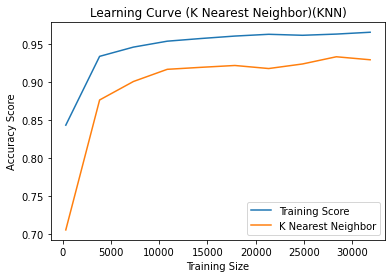

In [18]:
savePlot = True
train_sizes = TrainingSet
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'K Nearest Neighbor')

# plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
# plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve (K Nearest Neighbor)(KNN)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
# if savePlot:
#     plt.savefig('images/Assgn1_KNN_10_Digit.png')

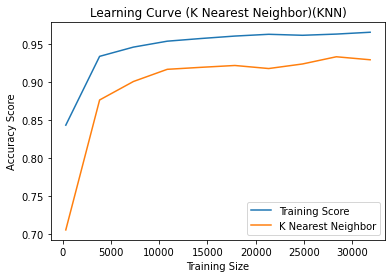

In [19]:
savePlot = True
train_sizes = TrainingSet
plt.plot(train_sizes, train_mean, label = 'Training Score')
plt.plot(train_sizes, test_mean, label = 'K Nearest Neighbor')

# plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
# plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title('Learning Curve (K Nearest Neighbor)(KNN)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
if savePlot:
    plt.savefig('images/Assgn1_KNN_10_Digit.png')

In [ ]:
scores = cross_val_score(model_KNN, X, y, cv = 10, scoring = 'accuracy')

In [ ]:
print(scores)

In [ ]:
print(scores.mean())

In [ ]:
k_range = range(1, 41)
k_scores = []
for i in range(1, 41, 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, y, cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [ ]:
k_range = range(1, 41)
plt.plot(k_range, k_scores, label = 'Training Score')
